In [2]:
import requests
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

weather_data_df = pd.DataFrame([])

for y in range(2015,2021):
    weather_url = f'http://spreadtrends.com/api/nfl/games/{y}?format=json'
    weather_results = requests.get(weather_url).json()
    temp_weather_df = pd.json_normalize(weather_results, record_path = ['results'])
    weather_data_df = weather_data_df.append(temp_weather_df)

# create dataframe of the columns we want to analyze

weather_data_df = weather_data_df[['gameId', 'season', 'type','surface', 'temperature', 'conditions', 'windSpeed']]

# filter out all game types other than 'Regular'
#weather_df = weather_df.loc[weather_df['type'] == 'Regular']

weather_data_df.to_csv('weather_data.csv')

In [3]:
weather_data_df

,gameId,season,type,surface,temperature,conditions,windSpeed
0,3854,2015,SuperBowl,Grass,76.0,clear sky,16.0
1,3853,2015,Playoff-CONF,Grass,37.0,clear sky,3.5
2,3852,2015,Playoff-CONF,Grass,37.0,mostly cloudy,5.8
3,3849,2015,Playoff-DIV,Grass,37.9,partly cloudy,12.7
4,3850,2015,Playoff-DIV,Grass,46.4,scattered clouds,6.9
...,...,...,...,...,...,...,...
264,4931,2020,Regular,Grass,81.0,clear sky,5.0
265,4932,2020,Regular,Turf-Dome,71.0,partly cloudy,14.0
266,4933,2020,Regular,Turf-Roof,80.0,cloudy,7.0
267,4934,2020,Regular,Turf,70.0,partly cloudy,8.0


In [13]:
# loop through all weeks in the season and create data frame with stats

player_stats_data_df = pd.DataFrame([])

for y in range(2015,2021):
    for x in range(1,18):
        stats_url = f'http://spreadtrends.com/api/nfl/games/{y}/{x}/stats?format=json'
        stats_results = requests.get(stats_url).json()
        temp_df = pd.json_normalize(stats_results, record_path = ['results'])
        player_stats_data_df = player_stats_data_df.append(temp_df)
    
#create a csv file


player_stats_data_df.to_csv('player_game_stats.csv')


In [5]:
player_stats_data_df

,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,passTds,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,0,1,0,7,41,0,0,0,0
1,3603,2015,1,Hyde,C,RB,28,Vikings,49ers,0,...,0,0,0,0,26,168,2,2,14,0
2,3603,2015,1,Bush,R,RB,25,Vikings,49ers,0,...,0,0,0,0,2,8,0,0,0,0
3,3603,2015,1,Hayne,Jarryd,RB,0,Vikings,49ers,0,...,0,0,0,0,4,13,0,1,7,0
4,3603,2015,1,Celek,G,TE,81,Vikings,49ers,0,...,0,0,0,0,0,0,0,3,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,5463,2020,17,Sims Jr.,Steven,WR,15,Eagles,Washington,0,...,0,0,0,0,1,18,0,1,6,0
336,5463,2020,17,Gibson,Antonio,WR,24,Eagles,Washington,0,...,0,0,0,0,19,75,0,1,6,0
337,5463,2020,17,Sims,Cam,WR,89,Eagles,Washington,0,...,0,0,0,0,0,0,0,5,43,0
338,5463,2020,17,McKissic,J.D.,WR,30,Eagles,Washington,0,...,0,0,0,0,2,0,0,5,30,0


In [6]:
# QB Rating cacluation

A = ((player_stats_data_df['comp'] / player_stats_data_df['att'])-.3)*5
B = ((player_stats_data_df['passYds'] / player_stats_data_df['att'])-3)*.25
C = ((player_stats_data_df['passTds'] / player_stats_data_df['att']))*20
D = (2.375 - ((player_stats_data_df['ints'] / player_stats_data_df['att'])*25))

qb_rating = ((A + B + C + D)/6)*100

In [7]:
player_stats_data_df['QB Rating'] = qb_rating

qb_stats_df = player_stats_data_df.loc[player_stats_data_df['position'] == 'QB']
qb_stats_df.head()


,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds,QB Rating
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,1,0,7,41,0,0,0,0,83.012821
11,3590,2015,1,Cutler,J,QB,6,Packers,Bears,36,...,1,2,12,4,31,0,0,0,0,67.476852
22,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,34,...,0,0,0,4,1,0,0,0,0,115.931373
32,3589,2015,1,Taylor,T,QB,2,Colts,Bills,19,...,0,0,0,9,39,0,0,0,0,123.793860
42,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,40,...,1,4,25,1,-1,0,0,0,0,59.895833


In [9]:
combined_qb_df = qb_stats_df.merge(weather_data_df, how='left', on='gameId')

In [39]:
combined_qb_df['conditions'].value_counts()

# average QB rating per condition

clear sky               179
overcast clouds         118
broken clouds            85
few clouds               71
cloudy                   48
scattered clouds         45
light rain               20
moderate rain            18
partly cloudy            15
mist                      9
haze                      8
light snow                4
rain                      3
heavy intensity rain      2
fog                       2
thunderstorm              2
Name: conditions, dtype: int64

In [10]:
# create qb_weather csv
combined_qb_df.to_csv('QB Stats and Weather Data.csv')

Text(0, 0.5, 'QB Rating')

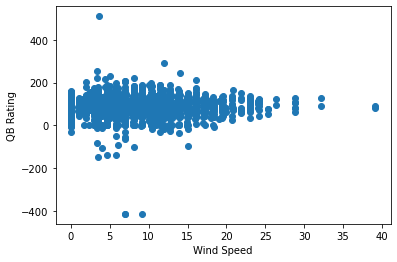

In [11]:
x_axis = combined_qb_df['windSpeed']
y_axis = combined_qb_df['QB Rating']

plt.scatter(x_axis, y_axis)
plt.xlabel('Wind Speed')
plt.ylabel('QB Rating')

Text(0, 0.5, 'QB Rating')

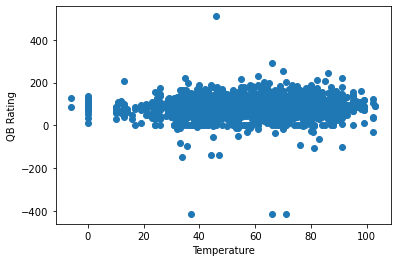

In [12]:
x_axis = combined_qb_df['temperature']
y_axis = combined_qb_df['QB Rating']

plt.scatter(x_axis, y_axis)
plt.xlabel('Temperature')
plt.ylabel('QB Rating')